In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.style

In [4]:
import matplotlib.pyplot as plt

In [9]:
df_airline=pd.read_csv("C:\\Users\\rcmlp.12\\Desktop\\working file\\Rahul Srivastava office doc python\\Time Series (ARIMA)\\time-series-airma - jupyter note book with dataset - 16 May2019\\AirPassengers.csv")

In [10]:
df_airline

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [12]:
df_airline.isnull()

,Month,#Passengers
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
139,False,False
140,False,False
141,False,False
142,False,False


In [13]:
df_airline.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [14]:
df_airline.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [15]:
df_airline["Month"]=pd.to_datetime(df_airline["Month"])

In [16]:
df_airline

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [17]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [19]:
df_airline.set_index("Month",inplace=True)

In [20]:
df_airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

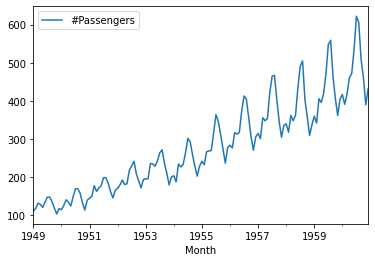

In [21]:
df_airline.plot()

In [26]:
from statsmodels.tsa.stattools import adfuller

In [32]:
def adf_test(series):
    result=adfuller(series)
    print("ADF Statistics: {}".format(result[0]))
    print("p-value: {}".format(result[1]))
    if result[1] <=0.05:
        print("Strong evidence against the null hypothesis,reject the null hypothesis, The data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis, time series has unit root, indicating it is non stationary")

In [34]:
adf_test(df_airline["#Passengers"])

ADF Statistics: 0.8153688792060502
p-value: 0.991880243437641
Weak evidence against the null hypothesis, time series has unit root, indicating it is non stationary


In [35]:
df_airline["Passengers First Difference"]=df_airline["#Passengers"]-df_airline["#Passengers"].shift(1)


In [36]:
df_airline.head()

,#Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [37]:
adf_test(df_airline["Passengers First Difference"].dropna())

ADF Statistics: -2.829266824170006
p-value: 0.05421329028382468
Weak evidence against the null hypothesis, time series has unit root, indicating it is non stationary


In [38]:
df_airline["Passengers Second Difference"]=df_airline["Passengers First Difference"]-df_airline["Passengers First Difference"].shift(1)

In [39]:
adf_test(df_airline["Passengers Second Difference"].dropna())

ADF Statistics: -16.384231542468527
p-value: 2.732891850014085e-29
Strong evidence against the null hypothesis,reject the null hypothesis, The data has no unit root and is stationary


In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

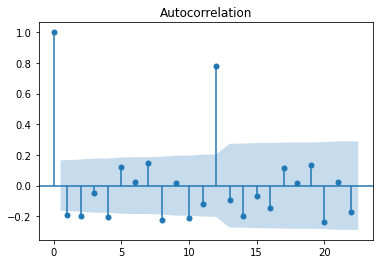

In [41]:
acf=plot_acf(df_airline["Passengers Second Difference"].dropna())